In [47]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
dataset = pd.read_csv(url)
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer,  MinMaxScaler, MaxAbsScaler, LabelEncoder

df = pd.DataFrame(dataset)

# ohe = OneHotEncoder(sparse_output=False)
# gender_ohe = ohe.fit_transform(df[['Genre']])
# gender_ohe_df = pd.DataFrame(gender_ohe, columns=ohe.get_feature_names_out(['Genre']))
# df = pd.concat([df, gender_ohe_df], axis=1)

le = LabelEncoder()
gender_le = le.fit_transform(df[['Genre']])
gender_le_df = pd.DataFrame(gender_le, columns=['Gender'])
df = pd.concat([df, gender_le_df], axis=1)

df = df.drop('Genre', axis=1)

scaler = MaxAbsScaler()
scaled_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
df[scaled_columns] = scaler.fit_transform(df[scaled_columns])
df = df.drop('CustomerID', axis=1)
df.head()

/home/raiden/.local/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,Age,Annual Income (k$),Spending Score (1-100),Gender
0,0.271429,0.109489,0.393939,1
1,0.300000,0.109489,0.818182,1
2,0.285714,0.116788,0.060606,0
3,0.328571,0.116788,0.777778,0
4,0.442857,0.124088,0.404040,0


In [51]:
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.271429,0.109489,0.393939
1,0.300000,0.109489,0.818182
2,0.285714,0.116788,0.060606
3,0.328571,0.116788,0.777778
4,0.442857,0.124088,0.404040


KMeans - это алгоритм кластеризации, используемый для разделения набора данных на предопределенное количество кластеров. Он основан на минимизации суммы квадратов расстояний между точками данных и центроидами кластеров. Основные шаги алгоритма KMeans следующие:

1. Инициализация: Выбираются случайные центроиды для каждого кластера.
2. Присваивание: Каждая точка данных присваивается к ближайшему центроиду на основе расстояния.
3. Пересчет центроидов: Центроиды пересчитываются путем вычисления среднего значения всех точек данных, принадлежащих кластеру.
4. Повторение: Шаги 2 и 3 повторяются до сходимости алгоритма, когда изменения центроидов становятся незначительными или число итераций достигает предела.

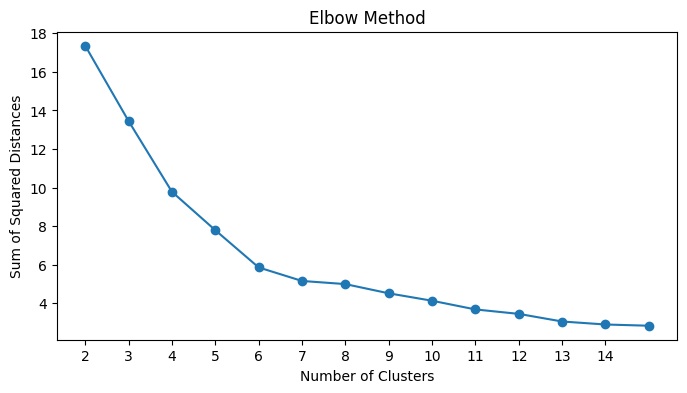

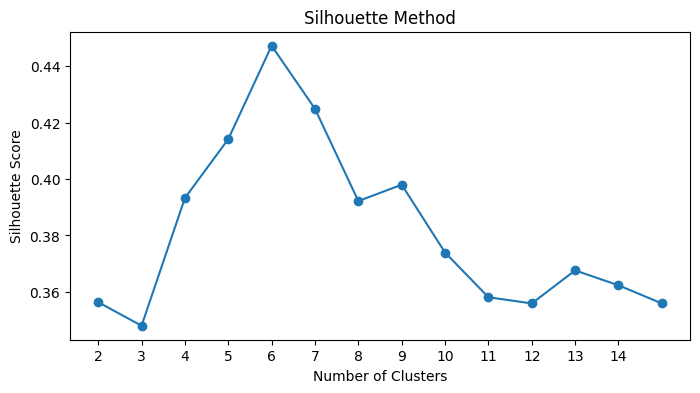

In [65]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Выбор диапазона количества кластеров
min_clusters = 2
max_clusters = 15

# Списки для сохранения значений суммы квадратов расстояний и коэффициента силуэта
inertia = []
silhouette = []

# Выполнение KMeans для разного количества кластеров
for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(data)  # Используем столбцы "Age", "Annual Income (k$)" и "Spending Score (1-100)"
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(data, kmeans.labels_))
    # Calculate silhouette scores for each sample
    silhouette_vals = silhouette_samples(data, kmeans.labels_)
    # Compute the silhouette score for each sample
    silhouette_avg = np.mean(silhouette_vals)
    
def plot(data, xlabel = "X", ylabel='Y', title='Title'):
    plt.figure(figsize=(8, 4))
    plt.plot(range(min_clusters, max_clusters+1), data, marker='o')
    plt.xticks(np.arange(min_clusters, max_clusters, step=1)) 
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Визуализация метода локтя
plot(inertia, 'Number of Clusters', 'Sum of Squared Distances', 'Elbow Method')
# Визуализация коэффициента силуэта
plot(silhouette, 'Number of Clusters', 'Silhouette Score', 'Silhouette Method')

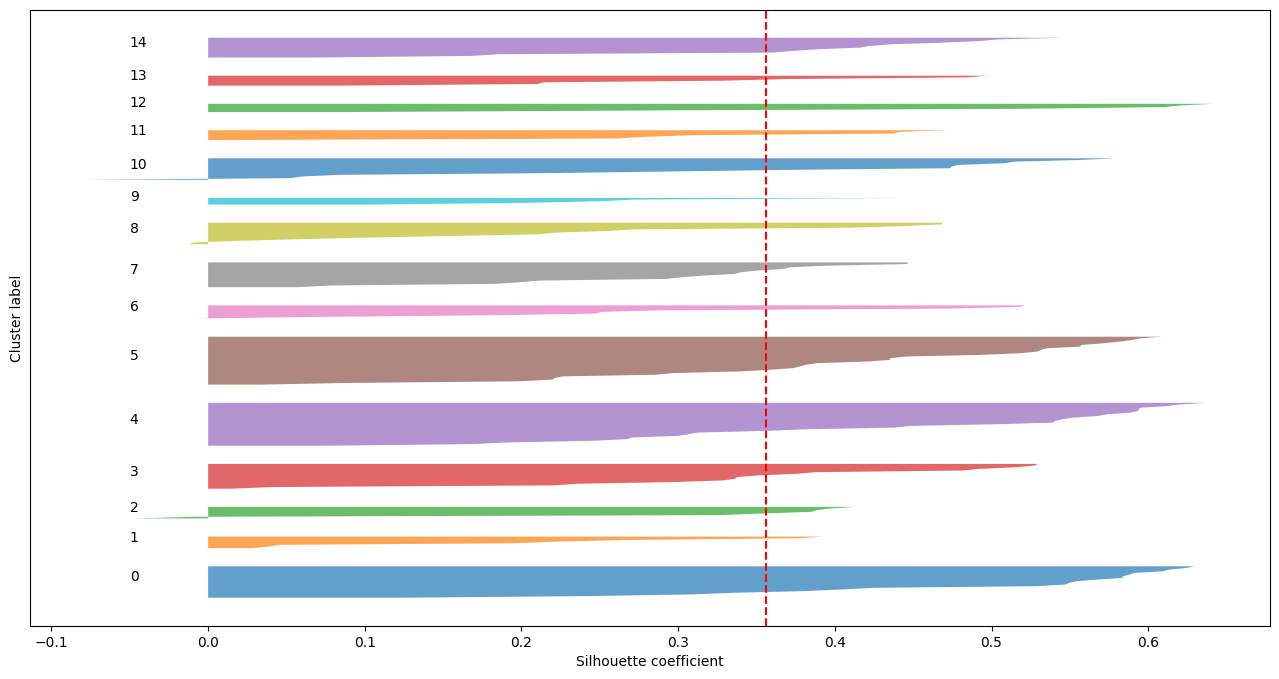

In [66]:
# Plot silhouette scores for each sample
fig, ax = plt.subplots(figsize=(16, 8))
y_lower = 10
for i in range(max_clusters):
    cluster_silhouette_vals = silhouette_vals[kmeans.labels_ == i]
    cluster_silhouette_vals.sort()
    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size

    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette coefficient")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()


PCA используется для разложения многомерного набора данных на набор последовательных ортогональных компонентов, которые объясняют максимальную величину дисперсии.

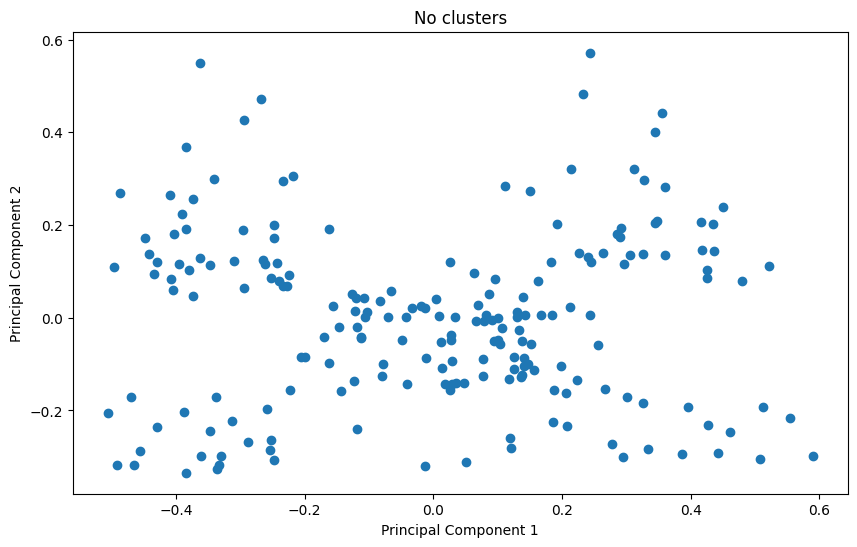

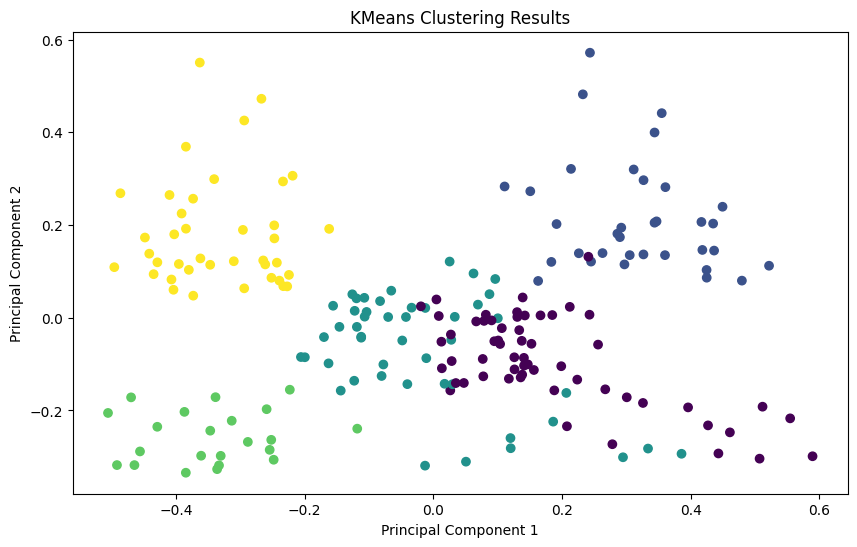

In [68]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA, TruncatedSVD, NMF

# Выполнение KMeans с оптимальным количеством кластеров
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(data)  # Используем столбцы "Age", "Annual Income (k$)" и "Spending Score (1-100)"

# Применение PCA для снижения размерности до 2 компонентов
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('No clusters')
plt.show()

# Визуализация кластеров
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering Results')
plt.show()


KernelЯдро PCA является расширением PCA, которое обеспечивает нелинейное уменьшение размерности за счет использования ядер. Он имеет множество применений, включая шумоподавление, сжатие и структурированное прогнозирование (оценка зависимостей ядра). KernelPCA поддерживает как transform, так и inverse_transform.

TruncatedSVD реализует вариант разложения по сингулярным значениям (SVD), который вычисляет только наибольшие сингулярные значения, где k - заданный пользователем параметр.

NMF - это альтернативный подход к декомпозиции, который предполагает, что данные и компоненты неотрицательны. NMF может быть подключен вместо PCA или его вариантов в тех случаях, когда матрица данных не содержит отрицательных значений.

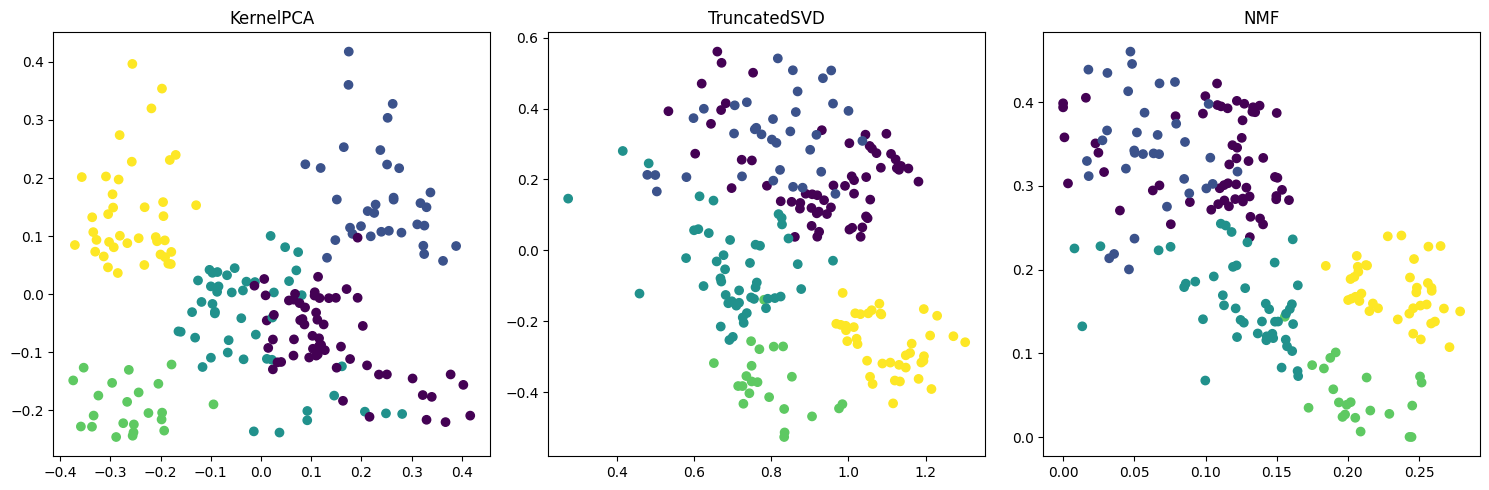

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits


kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(data)


svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(data)


nmf = NMF(n_components=2)
X_nmf = nmf.fit_transform(data)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))


axes[0].scatter(X_kpca[:, 0], X_kpca[:, 1], c=kmeans.labels_)
axes[0].set_title('KernelPCA')


axes[1].scatter(X_svd[:, 0], X_svd[:, 1], c=kmeans.labels_)
axes[1].set_title('TruncatedSVD')


axes[2].scatter(X_nmf[:, 0], X_nmf[:, 1], c=kmeans.labels_)
axes[2].set_title('NMF')

plt.tight_layout()
plt.show()

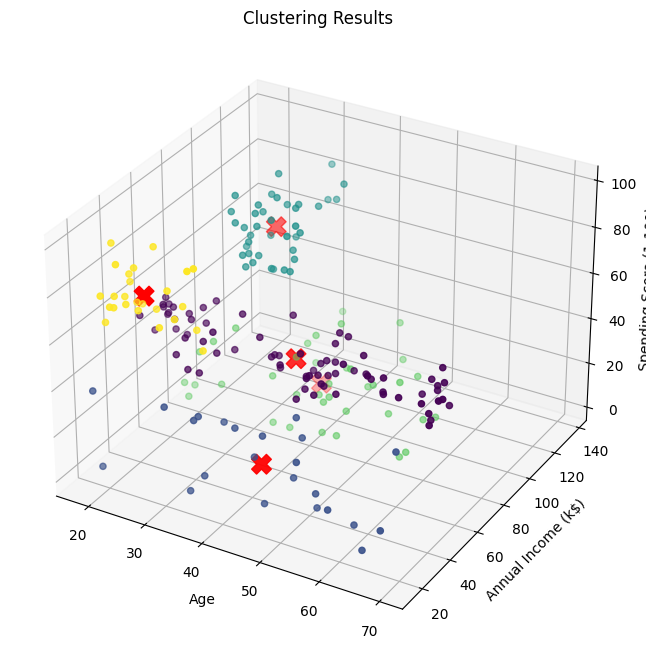

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Age'], dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Clustering Results')
plt.show()

In [28]:
import plotly.express as px

# Добавляем метки кластеров к исходному набору данных
dataset['Cluster'] = kmeans.labels_

# Визуализация интерактивного 3D-графика
fig = px.scatter_3d(dataset, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='Cluster', symbol='Cluster', opacity=0.8, size_max=8)
fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Annual Income (k$)', zaxis_title='Spending Score (1-100)'), title='Clustering Results')
fig.show()

## Birch

Birch строит дерево, называемое деревом объектов кластеризации (CFT), для заданных данных. Данные, по существу, сжимаются с потерями в набор узлов объектов кластеризации (CF-узлов). Узлы CF имеют ряд подкластеров, называемых подкластерами объектов кластеризации (CF Sub clusters), и эти подкластеры CF, расположенные в нетерминальных узлах CF, могут иметь дочерние узлы CF.

* Новый образец вставляется в корень дерева CF, который является узлом CF. Затем он объединяется с подкластером корня, который имеет наименьший радиус после слияния, ограниченный условиями порога и коэффициента ветвления. Если в подкластере есть какой-либо дочерний узел, то это повторяется до тех пор, пока он не достигнет конечного узла. После нахождения ближайшего подкластера в листе свойства этого подкластера и родительских подкластеров рекурсивно обновляются.

* Если радиус подкластера, полученного путем слияния новой выборки и ближайшего подкластера, больше квадрата порогового значения и если количество подкластеров больше коэффициента ветвления, то для этой новой выборки временно выделяется пространство. Берутся два самых удаленных подкластера, и подкластеры делятся на две группы на основе расстояния между этими подкластерами.

* Если у этого разделенного узла есть родительский подкластер и есть место для нового подкластера, то родительский узел разделяется на два. Если места нет, то этот узел снова разделяется на два, и процесс продолжается рекурсивно, пока не достигнет корня.

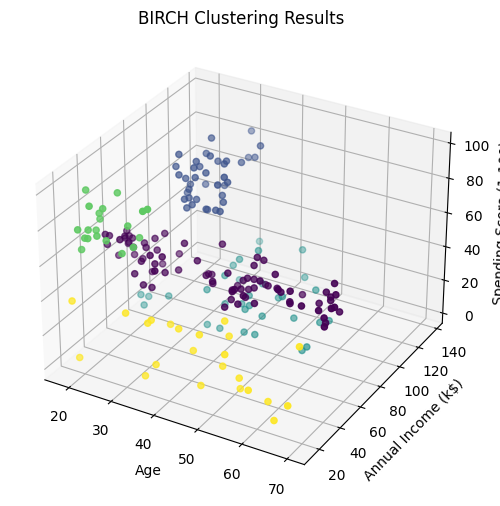

In [29]:
from sklearn.cluster import Birch

# Метод BIRCH
birch = Birch(n_clusters=5)
birch_labels = birch.fit_predict(dataset.iloc[:, 2:])

# Визуализация кластеров методом BIRCH
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Age'], dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=birch_labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('BIRCH Clustering Results')
plt.show()


## OPTICS

Алгоритм OPTICS имеет много общего с алгоритмом DBSCAN и может рассматриваться как обобщение DBSCAN, которое снижает требования к eps с одного значения до диапазона значений. Ключевое различие между DBSCAN и OPTICS заключается в том, что алгоритм OPTICS строит график достижимости, который присваивает каждой выборке как расстояние достижимости, так и точку в атрибуте cluster ordering; эти два атрибута присваиваются при подгонке модели и используются для определения принадлежности к кластеру. Если OPTICS запускается со значением inf по умолчанию, установленным для max_eps, то извлечение кластера в стиле DBSCAN может выполняться повторно за линейное время для любого заданного значения eps с использованием метода cluster_optics_dbscan. Установка max_ips на меньшее значение приведет к сокращению времени выполнения, и его можно рассматривать как максимальный радиус окрестности от каждой точки для поиска других потенциально доступных точек.

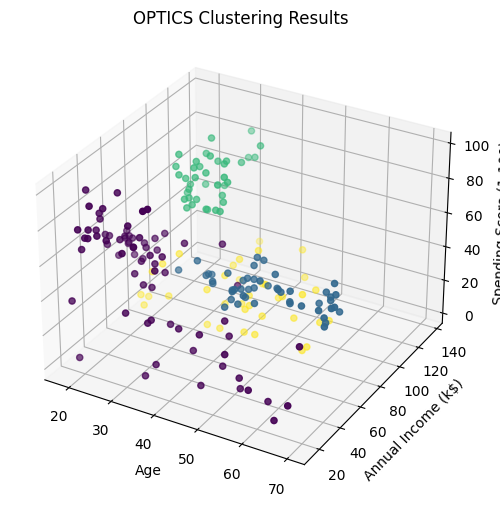

In [30]:
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset.iloc[:, 2:])

# Метод OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.15)
optics.fit(scaled_data)

# Получение меток кластеров
optics_labels = optics.labels_

# Визуализация кластеров методом OPTICS
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['Age'], dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=optics_labels, cmap='viridis')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('OPTICS Clustering Results')
plt.show()


Отличия методов перечислены в таблице: https://scikit-learn.org/stable/modules/clustering.html

Методы отличаются по:
* Входным параметрам
* Масштабируемости (по числу классов и по числу семплов)
* Примеру использования
* Метрике

## Выводы

* Метод локтя и коэффициент силуэта не дают 100% гарантии в нахождении оптимального числа кластеров. По сути, они лишь минимизируют расстояние по определенной метрике. Оптмимальное число кластеров корректируется эмпирически (экспериментально).
* Не каждый признак будет релевантен в кластеризации, в этом примере признак Пол дает дополнительное разбиение, которое вряд ли является релевантным.
* При применении методов уменьшения размерности и отображения кластеров в 2d-3d мерном пространстве, когда изначальное признаковое пространство имеет размерность больше 3, теряется часть информации в виде связей, скоплений. Это нужно иметь в виду и ориентироваться на визуальное отображение в меньшей степени.
* Различные алгоритмы кластеризации имеют свои преимущества и недостатки, ограничения. Оптимальный метод оптимизации будет зависить от начальных данных. Примерное число кластеров, число семплов.